In [307]:
# citation:
# https://www.kaggle.com/code/calvinwang0312/netflix-dataset-eda-tf-idf-recommendation

In [308]:
!python --version

Python 3.7.13


In [309]:
import pandas as pd
import matplotlib.pyplot as plt

In [310]:
file_path = ".\\rsc\\mysql\\netflix_titles.csv"

netflix_data = pd.read_csv(file_path)

In [311]:
netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [312]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [313]:
for i in netflix_data.columns:
    null_percent = netflix_data[i].isna().sum()/len(netflix_data) *100
    print("{} null rate: {}%".format(i,round(null_percent,2)))

show_id null rate: 0.0%
type null rate: 0.0%
title null rate: 0.0%
director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
release_year null rate: 0.0%
rating null rate: 0.05%
duration null rate: 0.03%
listed_in null rate: 0.0%
description null rate: 0.0%


In [314]:
netflix_data['title'] = netflix_data['title'].str.lower()

netflix_data.drop('description', axis=1, inplace=True)
netflix_data.drop('director', axis=1, inplace=True)
netflix_data.drop('rating', axis=1, inplace=True)

# transform the type of date_added into datetime
netflix_data.loc[:, 'date_added'] = pd.to_datetime(netflix_data['date_added'])

# transform the type of show_id into int64
netflix_data['show_id'] = pd.factorize(netflix_data['show_id'])[0]

# delete all TV Show records
netflix_data = netflix_data[netflix_data['type'] != 'Movie']

In [315]:
for i in netflix_data.columns:
    null_percent = netflix_data[i].isna().sum()/len(netflix_data) *100
    print("{} null rate: {}%".format(i,round(null_percent,2)))

show_id null rate: 0.0%
type null rate: 0.0%
title null rate: 0.0%
cast null rate: 13.08%
country null rate: 14.61%
date_added null rate: 0.37%
release_year null rate: 0.0%
duration null rate: 0.0%
listed_in null rate: 0.0%


In [316]:
netflix_data.head(3)

,show_id,type,title,cast,country,date_added,release_year,duration,listed_in
1,1,TV Show,blood & water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,2,TV Show,ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,3,TV Show,jailbirds new orleans,NaN,NaN,2021-09-24,2021,1 Season,"Docuseries, Reality TV"


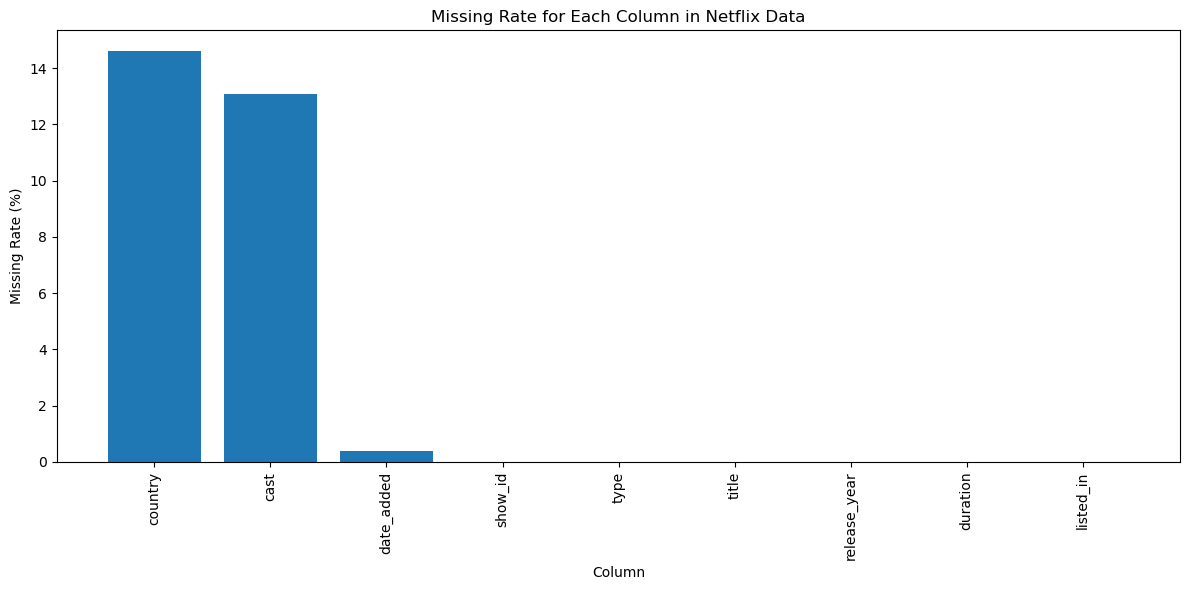

In [317]:
missing_data = pd.DataFrame(columns=['Column', 'MissingRate'])

for i in netflix_data.columns:
    null_percent = netflix_data[i].isna().sum() / len(netflix_data) * 100
    missing_data = missing_data.append({'Column': i, 'MissingRate': null_percent}, ignore_index=True)

missing_data = missing_data.sort_values(by='MissingRate', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(missing_data['Column'], missing_data['MissingRate'])
plt.xlabel('Column')
plt.ylabel('Missing Rate (%)')
plt.title('Missing Rate for Each Column in Netflix Data')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [318]:
# Remove rows containing missing data
df = netflix_data.dropna()

In [319]:
# fracture listed_in attribute
df_temp = df.copy()
df = (
    df_temp.drop('listed_in', axis=1)
    .join(
        df_temp['listed_in'].str.split(', ', expand=True)
        # note that in original dataframe: the country fields can contain more than one country and they are seperated by ', '
        .stack()
        .reset_index(drop=True, level=1)
        .rename('listed_in')
    )
)
df = df.drop_duplicates().reset_index(drop=True)

In [320]:
df['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Romantic TV Shows', 'TV Comedies', 'British TV Shows',
       'Reality TV', 'Crime TV Shows', 'Spanish-Language TV Shows',
       'TV Action & Adventure', 'Docuseries', "Kids' TV",
       'TV Sci-Fi & Fantasy', 'Anime Series', 'Korean TV Shows',
       'Teen TV Shows', 'TV Horror', 'TV Shows', 'Classic & Cult TV',
       'TV Thrillers', 'Science & Nature TV',
       'Stand-Up Comedy & Talk Shows'], dtype=object)

In [321]:
# Updated category mapping
category_mapping = {
    'Drama & Adventure': ['TV Dramas', 'TV Mysteries', 'Crime TV Shows', 'TV Thrillers', 'TV Action & Adventure'],
    'Comedy': ['TV Comedies', 'Stand-Up Comedy & Talk Shows'],
    'Science Fiction & Kids': ['TV Sci-Fi & Fantasy', "Kids' TV"],  
    'Reality & Documentary': ['Reality TV', 'Docuseries', 'Science & Nature TV'],
    'International': ['International TV Shows', 'Spanish-Language TV Shows', 'British TV Shows']
}

# Function to map genres to categories
def map_category(genre):
    for category, genres in category_mapping.items():
        if genre in genres:
            return category
    return None

# Applying the mapping function to the 'listed_in' column
df['listed_in'] = df['listed_in'].apply(map_category)

In [322]:
df = df.dropna()

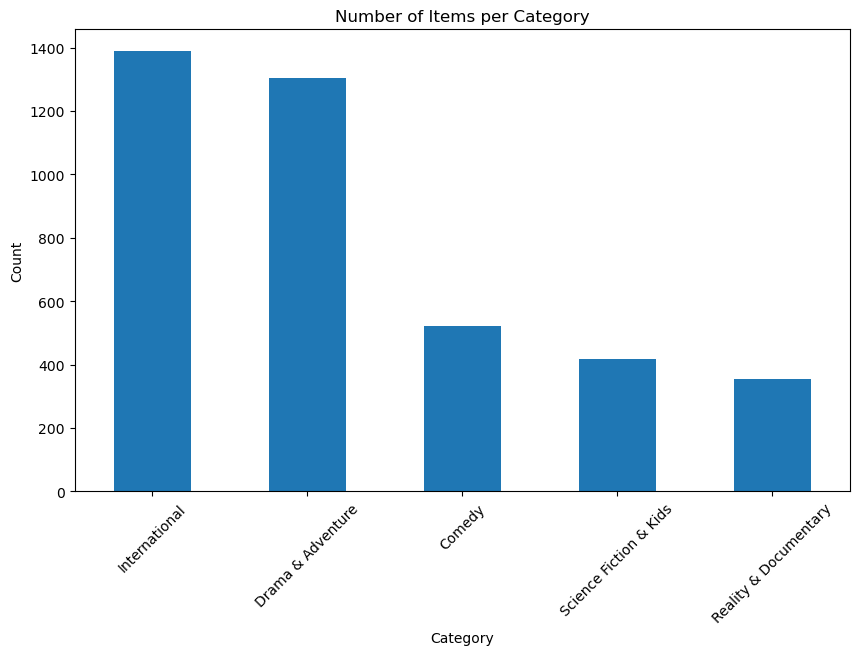

In [323]:
category_counts = df['listed_in'].dropna().value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Number of Items per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [324]:
df['listed_in'].unique()

array(['International', 'Drama & Adventure', 'Comedy',
       'Reality & Documentary', 'Science Fiction & Kids'], dtype=object)

In [325]:
# transform the type of duration into int64
df['duration'] = df['duration'].str.extract('(\d+)').astype(int)

In [326]:
# We can observe that each moive contains several cast and countries
# To simplify the problem, we resolve the cast attribute, and only maintain the first country in country attribute
df_temp = df.copy()
df = (
    df_temp.drop('cast', axis=1)
    .join(
        df_temp['cast'].str.split(', ', expand=True)
        # note that in original dataframe: the country fields can contain more than one country and they are seperated by ', '
        .stack()
        .reset_index(drop=True, level=1)
        .rename('cast')
    )
)

df['country'] = df['country'].str.split(', ').str[0]

In [327]:
df.head(20)

,show_id,type,title,country,date_added,release_year,duration,listed_in,cast
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Ama Qamata
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Khosi Ngema
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Gail Mabalane
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Thabang Molaba
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Dillon Windvogel
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Natasha Thahane
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Arno Greeff
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Xolile Tshabalala
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Getmore Sithole
0,1,TV Show,blood & water,South Africa,2021-09-24,2021,2,International,Cindy Mahlangu


In [334]:
df['cast'] = df['cast'].str.replace('"', '')

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34720 entries, 0 to 4729
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       34720 non-null  int64         
 1   type          34720 non-null  object        
 2   title         34720 non-null  object        
 3   country       34720 non-null  object        
 4   date_added    34720 non-null  datetime64[ns]
 5   release_year  34720 non-null  int64         
 6   duration      34720 non-null  int32         
 7   listed_in     34720 non-null  object        
 8   cast          34720 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 2.5+ MB


In [336]:
df.to_csv('new_netflix_titles.csv', index=False)

In [332]:
df['listed_in'].unique()

array(['International', 'Drama & Adventure', 'Comedy',
       'Reality & Documentary', 'Science Fiction & Kids'], dtype=object)

In [335]:
selected_rows = df['cast'][620:630]

# 打印这些行的数据
print(selected_rows)

79                      Efa Iwara
79                      Titi Kuti
79    Tobechukwu iLLbliss Ejiofor
79     Remilekun Reminisce Safaru
79      Charles  Charly Boy Oputa
79                  Nse Ikpe-Etim
79         Keppy Ekpenyong Bassey
79                   Bimbo Manuel
79                     Akin Lewis
79                     Lord Frank
Name: cast, dtype: object


In [337]:
result = df[df['title'] == '72 dangerous animals: asia']

print(result)

      show_id     type                       title    country date_added  \
2983     4702  TV Show  72 dangerous animals: asia  Australia 2018-08-10   
2984     4702  TV Show  72 dangerous animals: asia  Australia 2018-08-10   
2985     4702  TV Show  72 dangerous animals: asia  Australia 2018-08-10   

      release_year  duration              listed_in          cast  
2983          2018         1  Reality & Documentary  Bob Brisbane  
2984          2018         1          International  Bob Brisbane  
2985          2018         1  Reality & Documentary  Bob Brisbane  
